# Import and Setup

In [15]:
import datetime as dt
import pandas as pd
import numpy as np
import glob

In [16]:
import matplotlib.pyplot as plt
plt.style.use('../../style.mplstyle')
colors = plt.rcParams['axes.prop_cycle'].by_key()['color']

In [17]:
import sys
sys.path.insert(0, '../../../purity-monitor/')
sys.path.insert(0, '../../WaveformAnalysis/')
import Dataset as Dataset
import StandMonitor as Monitor
import PlotFunctions as Plt

In [18]:
import importlib
importlib.reload(Dataset)
importlib.reload(Monitor)
importlib.reload(Plt)

<module 'PlotFunctions' from '../../WaveformAnalysis\\PlotFunctions.py'>

# Data Read-In

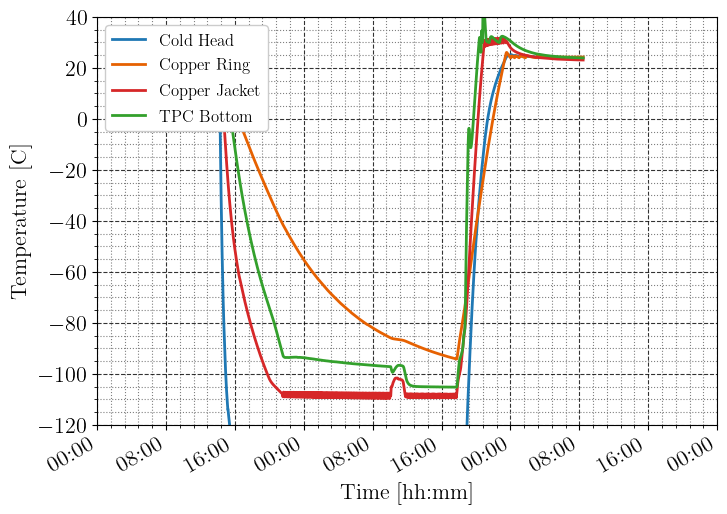

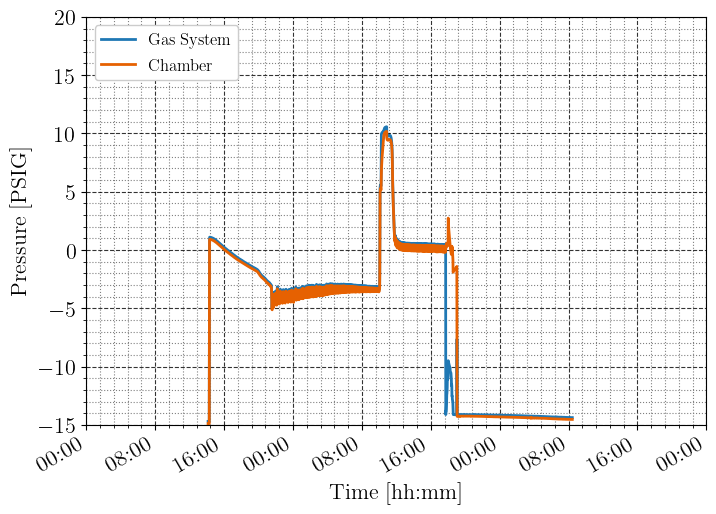

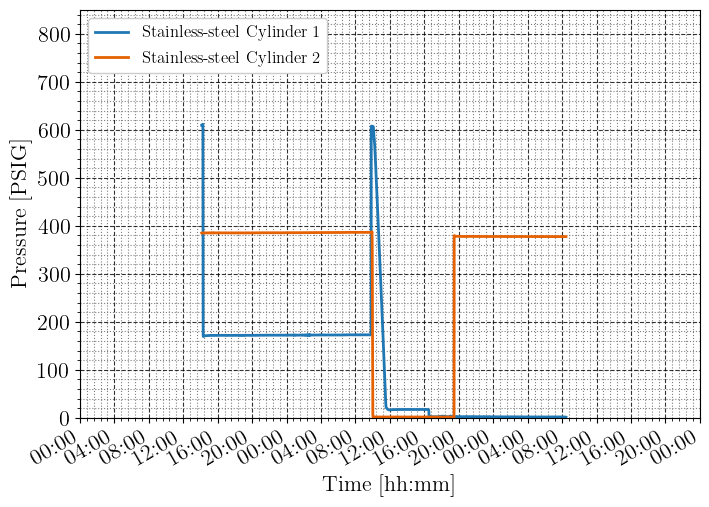

In [24]:
Sensors = []
Files = ['C:/Data/StandStatus/20220116.h5','C:/Data/StandStatus/20220117.h5','C:/Data/StandStatus/20220118.h5']
# Files = ['C:/Data/StandStatus/20220117.h5']
for File in Files: 
    Sensor = Monitor.SensorData(Filepath=File)
    Sensor.GetData()
    Sensors.append(Sensor)

AllSensors = Monitor.SensorData()
AllSensors.Combine(Sensors)
XRange = [dt.datetime(2022,1,16,0,0), dt.datetime(2022,1,19,0,0)]

AllSensors.PlotData(Data=AllSensors.Temp, Selection='Temperature', XTicks=480, YTicks=20, XRange=XRange, YRange=[-120,40], Bin=120)
AllSensors.PlotData(Data=AllSensors.SPressure, Selection='System Pressure', XTicks=480, YTicks=5, XRange=XRange, YRange=[-15,20], Bin=120)
AllSensors.PlotData(Data=AllSensors.XPressure, Selection='Xenon Pressure', XTicks=240, YTicks=100, XRange=XRange, YRange=[0,850], Bin=120)

In [6]:
def rebin(hx,h, bin=1):
    h_rebin = []
    for i,x in enumerate(h[:int(len(h)/bin)]):
        num = i*bin
        h_rebin.append(h[num]+h[num+1])
    hx_rebin = [x for x in range(int(len(hx)/bin))]
    return np.array(hx_rebin), np.array(h_rebin)

In [7]:
# from scipy.signal import find_peaks
# from scipy.optimize import curve_fit

# def gauss(x,a,b,c):
#     return a*np.exp(-(x-b)**2/(2*c**2))

# def line(x,a,b):
#     return a*(x-b)

# def get_gain(ax, data):
#     xdata = [x for x in range(len(data))]
#     ax[1].set_xlim(0,5)
    
#     popt,pcov = curve_fit(line, xdata, data[:,1])
#     ax[1].plot(xdata, line(xdata, *popt), color='r', label='Gain: {:.2f} ADC/p.e.'.format(popt[0]))
#     ax[1].scatter(xdata, data[:,1], s=10, zorder=10)
#     ax[1].legend(loc='lower right')

# def fit_peaks(hx,h,ax):
#     print('='*10)
#     dist = 7
#     peaks = find_peaks(h, height=20, width=2, distance=dist)
#     peak_pos = peaks[0]
    
#     peak_diff = int(np.median(np.diff(peak_pos)))
#     dist = peak_diff + 2 
#     print(peak_pos, peak_diff)
#     params = []
#     for i in range(4):
#         p1 = peak_pos[0] + i*peak_diff
        
#         lo = p1-2
#         hi = p1+2
#         if lo<0: lo=0
        
#         # print(p1,lo,hi)
#         # print(h[lo:hi])
#         p = hx[np.where(h==np.max(h[lo:hi]))][0]
        
#         lo = p-2
#         hi = p+3
#         if lo<0: lo=0

#         print(p1,p,lo,hi)
#         popt,pcov = curve_fit(gauss, hx[lo:hi],h[lo:hi], p0=[h[p],p,10], maxfev=2000)
#         print(popt)
#         ax[0].plot(hx[lo:hi], gauss(hx[lo:hi], *popt), color='r')
#         params.append(popt)

#     get_gain(ax,np.array(params))
#     return 0

In [8]:
# for i,voltage in enumerate([29,30,31,32,33,34]):
# # for i,voltage in enumerate([32]):
#     f, ax = plt.subplots(2, 1, gridspec_kw={'height_ratios': [3, 1]})
#     ax[0].set_xlim(0,30)
#     ax[0].set_yscale('log')
#     print(i,voltage)
#     sumdata = 0
#     Path = "C:/Users/nEXO/Downloads/gain_calib_{}V/".format(voltage)
#     Files = glob.glob(Path+"IN2*.csv")
#     for j,f in enumerate(Files): 
#         data = pd.read_csv(f, delimiter=',', skiprows=1)
#         if j==0:
#             sumdata = data['Counts']
#         else:
#             sumdata += data['Counts']
#     hx,h = rebin(np.array(data['Channel']), np.array(sumdata), bin=10)
#     # ax[0].step(data['Channel'], sumdata, label='$V_\mathrm{{Bias}} = {}\,$V'.format(voltage),lw=1)
#     ax[0].step(hx,h, label='$V_\mathrm{{Bias}} = {}\,$V'.format(voltage),lw=1, color='k', where='mid')
#     # fit_peaks(np.array(data['Channel']), np.array(sumdata), ax)
#     fit_peaks(hx, h, ax, peak=8, diff=13)
#     print(np.sum(sumdata))
# ax[0].legend(loc='upper right')
# plt.show()

Number of files: 68
9756294
Number of files: 113
17260007


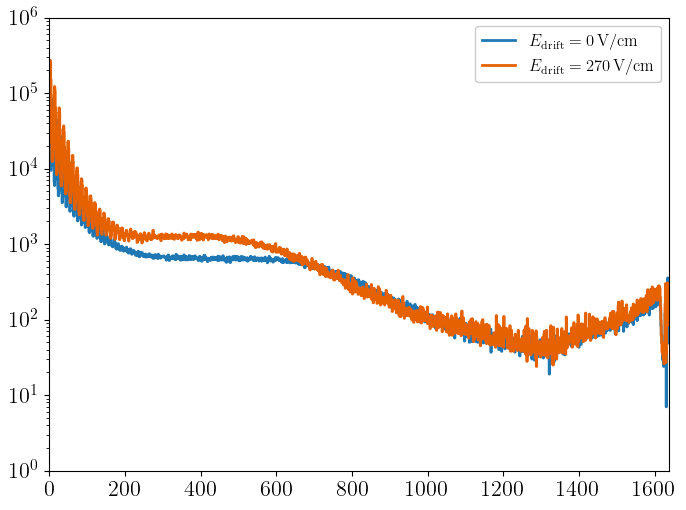

In [9]:
plt.figure()
plt.xlim(0,16384)
plt.xlim(0,1638)
# plt.xlim(0,200)
plt.yscale('log')

sumdata = 0
Path = "C:/Users/nEXO/Downloads/"

Files = glob.glob(Path+"source_data_32V/IN2*.csv")
print('Number of files: {}'.format(len(Files)))

for j,f in enumerate(Files): 
    data = pd.read_csv(f, delimiter=',', skiprows=1)
    if j==0:
        sumdata = data['Counts']
    else:
        sumdata += data['Counts']
hx,h = rebin(np.array(data['Channel']), np.array(sumdata), 10)
plt.step(hx,h, label='$E_\mathrm{{drift}} = {}\,$V/cm'.format(0))
# plt.step(data['Channel'], sumdata, label='$E_\mathrm{{drift}} = {}\,$V/cm'.format(0))
print(np.sum(sumdata))

Files2 = glob.glob(Path+"source_data_field_32V/IN2*.csv")
print('Number of files: {}'.format(len(Files2)))

for j,f in enumerate(Files2): 
    data = pd.read_csv(f, delimiter=',', skiprows=1)
    if j==0:
        sumdata = data['Counts']
    else:
        sumdata += data['Counts']
hx,h = rebin(np.array(data['Channel']), np.array(sumdata), 10)
plt.step(hx,h, label='$E_\mathrm{{drift}} = {}\,$V/cm'.format(270))
# plt.step(data['Channel'], sumdata, label='$E_\mathrm{{drift}} = {}\,$V/cm'.format(270),lw=1)

print(np.sum(sumdata))
plt.legend(loc='upper right')
plt.show()

In [10]:
import importlib
importlib.reload(Dataset)

<module 'Dataset' from '../../WaveformAnalysis\\Dataset.py'>

['C:/Data/20220117\\LXe_SiPM_source_32V_32.0V_1.h5', 'C:/Data/20220117\\LXe_SiPM_source_32V_32.0V_2.h5', 'C:/Data/20220117\\LXe_SiPM_source_32V_32.0V_3.h5', 'C:/Data/20220117\\LXe_SiPM_source_32V_32.0V_4.h5', 'C:/Data/20220117\\LXe_SiPM_source_32V_32.0V_5.h5', 'C:/Data/20220117\\LXe_SiPM_source_32V_32.0V_6.h5', 'C:/Data/20220117\\LXe_SiPM_source_32V_32.0V_7.h5', 'C:/Data/20220117\\LXe_SiPM_source_32V_32.0V_8.h5', 'C:/Data/20220117\\LXe_SiPM_source_32V_32.0V_9.h5']
C:/Data/20220117\LXe_SiPM_source_32V_32.0V_1.h5
C:/Data/20220117\LXe_SiPM_source_32V_32.0V_2.h5
C:/Data/20220117\LXe_SiPM_source_32V_32.0V_3.h5
C:/Data/20220117\LXe_SiPM_source_32V_32.0V_4.h5
C:/Data/20220117\LXe_SiPM_source_32V_32.0V_5.h5
C:/Data/20220117\LXe_SiPM_source_32V_32.0V_6.h5
C:/Data/20220117\LXe_SiPM_source_32V_32.0V_7.h5
C:/Data/20220117\LXe_SiPM_source_32V_32.0V_8.h5
C:/Data/20220117\LXe_SiPM_source_32V_32.0V_9.h5
99208


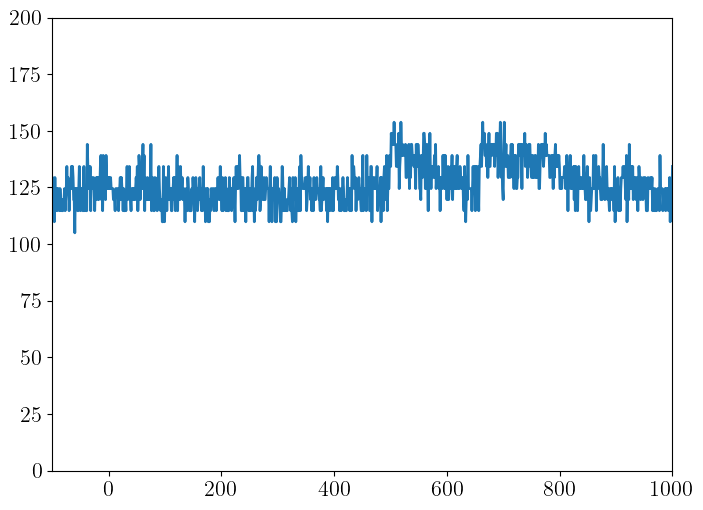

In [11]:
D0 = Dataset.Dataset(Path='C:/Data/20220117/', Selection='LXe*.h5')
print(D0.Files)
D0.Ch[1].Pol = 1
for File in D0.Files:
    print(File)
    D0.ImportDataFromHDF5(File, D0.Ch)

# Print=True
# for ii, ch in enumerate(D0.Ch):
#     ch.GetSampling()
#     ch.Amp = np.array(ch.Amp)
    # ch.TimeStamp = np.array(sorted(ch.TimeStamp))
    # ch.Amp = ch.SubtractBaseline(Data=ch.Amp, state=Print)
    # ch.GetAllMaxima(Data=ch.Amp, Time=5, state=Print)
for i,x in enumerate(D0.Ch[1].Amp):
    if i>0:
        break
    print(len(x))
    plt.plot(D0.Ch[0].Time, x)
    plt.xlim(-100,1000)
    plt.ylim(0,200)

In [12]:
# delta = dt.datetime(2021,11,10,0,0) - dt.datetime(2021,5,12,0,0)
# capdata_last = pd.read_csv("C:/Data/LevelMeter/20210512_liquefaction_10.csv", names=['Time', 'Level'])
# timestamp_last = np.array([dt.datetime.strptime(x, "%m/%d/%Y %I:%M:%S %p") + delta for x in capdata_last['Time']])
# cap_last = np.array(capdata_last['Level'])

In [13]:
# capdata = pd.read_csv("C:/Data/LevelMeter/20211110_liquefaction_16.csv", names=['Time', 'Level'])
# timestamp = np.array([dt.datetime.strptime(x, "%m/%d/%Y %I:%M:%S %p") for x in capdata['Time']])
# cap = np.array(capdata['Level'])
# formatter = matplotlib.dates.DateFormatter('%H:%M')

# fig = plt.figure()
# ax = fig.gca()

# XRange = [dt.datetime(2021,11,10,8,0), dt.datetime(2021,11,10,19,0)]

# plt.gcf().axes[0].xaxis.set_major_formatter(formatter)
# plt.gcf().autofmt_xdate()
# plt.grid()
# plt.xlabel('Time [hh:mm]')
# plt.ylabel('Capacitance [pF]')

# plt.xlim(XRange[0], XRange[1])
# ax.xaxis.set_major_locator(matplotlib.dates.MinuteLocator(interval=60))

# cut = np.where((timestamp>XRange[0]) & (cap>0))
# plt.plot(timestamp[cut][::10], cap[cut][::10], lw=1)
# print(cap[cut][-1])
# print(cap[cut][0])
# cut_last = np.where((timestamp_last>XRange[0]) & (cap_last>0))
# plt.errorbar(timestamp_last[cut_last][::10], cap_last[cut_last][::10], lw=1)

# plt.hlines(y=cap[cut][0], xmin=XRange[0], xmax=XRange[1], ls='--', color='k')
             
# plt.ylim(150,180)
# plt.show() 